In [1]:
import yfinance as yf
import pandas as pd
import os

C:\Users\sambit.a.sinha\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sambit.a.sinha\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# pip install yfinance

In [3]:
obj = yf.Ticker("^GSPC")

In [4]:
df = obj.history(period='max')

In [5]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-14 00:00:00-04:00,5175.140137,5176.850098,5123.299805,5150.479980,4687970000,0.0,0.0
2024-03-15 00:00:00-04:00,5123.310059,5136.859863,5104.350098,5117.089844,7753670000,0.0,0.0
2024-03-18 00:00:00-04:00,5154.770020,5175.600098,5145.470215,5149.419922,4036220000,0.0,0.0


In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
df.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-03-07 00:00:00-05:00', '2024-03-08 00:00:00-05:00',
               '2024-03-11 00:00:00-04:00', '2024-03-12 00:00:00-04:00',
               '2024-03-13 00:00:00-04:00', '2024-03-14 00:00:00-04:00',
               '2024-03-15 00:00:00-04:00', '2024-03-18 00:00:00-04:00',
               '2024-03-19 00:00:00-04:00', '2024-03-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24170, freq=None)

<AxesSubplot:xlabel='Date'>

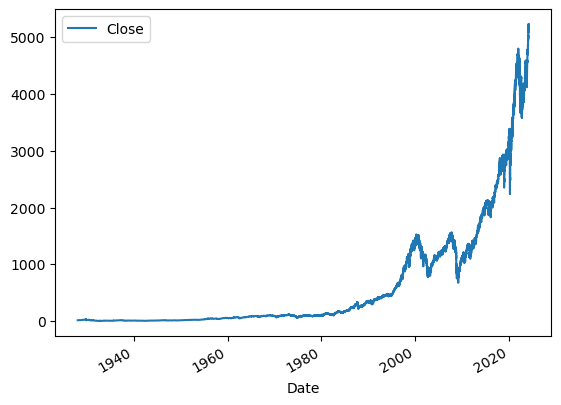

In [8]:
df.plot(y='Close',use_index=True)

In [9]:
del df['Dividends']
del df['Stock Splits']

In [10]:
df['Tomorrow'] = df['Close'].shift(-1)

In [11]:
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)

In [12]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-03-14 00:00:00-04:00,5175.140137,5176.850098,5123.299805,5150.479980,4687970000,5117.089844,0
2024-03-15 00:00:00-04:00,5123.310059,5136.859863,5104.350098,5117.089844,7753670000,5149.419922,1
2024-03-18 00:00:00-04:00,5154.770020,5175.600098,5145.470215,5149.419922,4036220000,5178.509766,1


In [13]:
df = df.loc["1990-01-01":].copy()          #Taking only recent historical data into consideration

In [14]:
df.shape

(8620, 7)

In [15]:
from sklearn.ensemble import RandomForestClassifier
#RF classifiers can identify non-linear relationships. Here the relationship between price and target is non-linear. 

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)

train = df.iloc[:-114]
test = df.iloc[-114:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [16]:
pred = model.predict(test[predictors])
pred = pd.Series(pred,index = test.index)

In [17]:
from sklearn.metrics import precision_score
precision_score(test['Target'],pred)

0.5

In [18]:
combined = pd.concat([test["Target"], pred], axis=1)

<AxesSubplot:xlabel='Date'>

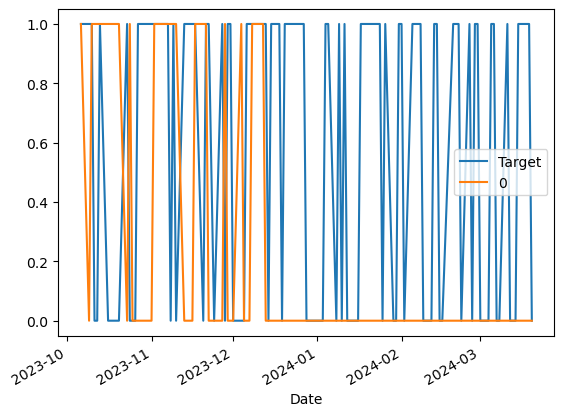

In [19]:
combined.plot()

In [20]:
import copy
def prediction(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    pred = model.predict(test[predictors])
    pred = pd.Series(pred,index = test.index, name = 'Predictions')
    combined = pd.concat([test["Target"], pred], axis=1)
    return combined

def backtesting(data, predictors, model, start = 2500, step = 250):
    all_pred = []
    for i in range(start, data.shape[0], step):
        train = copy.deepcopy(data[0:i])
        test = copy.deepcopy(data[i:i+step])
        pred_curr = prediction(train, test, predictors, model)
        all_pred.append(pred_curr)
    return all_pred
predictions1 = backtesting(df, predictors, model)

In [21]:
predictions1 = pd.concat(predictions1)


In [22]:
predictions1

,Target,Predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2024-03-14 00:00:00-04:00,0,0
2024-03-15 00:00:00-04:00,1,0
2024-03-18 00:00:00-04:00,1,0


In [23]:
predictions1['Predictions'].value_counts()

Predictions
0    3405
1    2715
Name: count, dtype: int64

In [24]:
precision_score(predictions1['Target'],predictions1['Predictions'])

0.5307550644567219

In [28]:
horizons = [2,5,60,250,1000]             #Taking rolling averages upto different time periods: 2days,5days,2months,1ye(ar,4years
new_predictors = []
for horizon in horizons:
    roll_avg = df.rolling(horizon).mean()    #Taking the rolling avg of all columns for this duration
#     print(type(roll_avg))
    ratio_col = f'Close_ratio_{horizon}'
    df[ratio_col] = df['Close']/roll_avg['Close']    #To understand whether current value is above the rolling avg or not
    
    trend_col = f'trend_{horizon}'
    df[trend_col] = df.shift(1).rolling(horizon).sum()['Target']   #To understand how many times in the window the value has gone up
    
    new_predictors += [ratio_col, trend_col]


In [29]:
df = df.dropna(subset=df.columns[df.columns != "Tomorrow"])

In [30]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,trend_2,Close_ratio_5,trend_5,Close_ratio_60,trend_60,Close_ratio_250,trend_250,Close_ratio_1000,trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-14 00:00:00-04:00,5175.140137,5176.850098,5123.299805,5150.479980,4687970000,5117.089844,0,0.998562,0.0,1.000766,1.0,1.046515,35.0,1.150413,140.0,1.266551,533.0
2024-03-15 00:00:00-04:00,5123.310059,5136.859863,5104.350098,5117.089844,7753670000,5149.419922,1,0.996748,0.0,0.994533,1.0,1.038407,34.0,1.141730,140.0,1.257523,532.0
2024-03-18 00:00:00-04:00,5154.770020,5175.600098,5145.470215,5149.419922,4036220000,5178.509766,1,1.003149,1.0,0.999594,2.0,1.043622,34.0,1.147717,140.0,1.264685,532.0


In [37]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#Keeping random_state=1 means model output won't change if other parameters aren't changed. So no randomness

In [38]:
def prediction(train, test, predictors, model):               #new prediction function to predict on the basis of custom probability 
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]     #Getting probability of getting 1 instead of predicting whether 1 or 0
    preds[preds >=.6] = 1                                  #Then using that prob to make judgement
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [40]:
model

RandomForestClassifier(min_samples_split=50, n_estimators=200, random_state=1)

In [51]:
predictions = backtesting(df, new_predictors, model)

In [52]:
predictions = pd.concat(predictions)

In [53]:
predictions["Predictions"].value_counts()

Predictions
0.0    4288
1.0     832
Name: count, dtype: int64

In [54]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5733173076923077